# CSE 5524 HW7 Utkarsh Pratap Singh Jadon

## Question 1

### Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import cv2 as cv
import numpy as np
import math
from PIL import Image
import glob
import os
import skimage
from os import listdir
from os.path import join, isfile
from skimage import morphology
from skimage import measure,color
from skimage import io, data 
from numpy.linalg import eig
from scipy import ndimage, misc
from scipy.ndimage import median_filter
import matplotlib.patches as patches

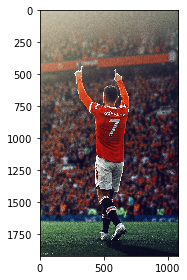

In [2]:
from skimage.segmentation import slic, mark_boundaries

img = skimage.io.imread('ronaldo.png')
skimage.io.imshow(img)

### Target number of superpixels = 250 & Compactness = 10

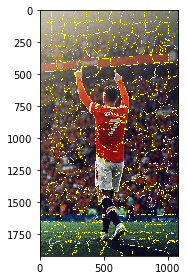

In [3]:
segments_slic1 = slic(img, n_segments=250, compactness=10)
skimage.io.imshow(mark_boundaries(img, segments_slic1))

### Target number of superpixels = 300 & Compactness = 10

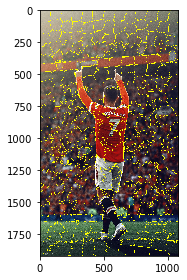

In [4]:
segments_slic2 = slic(img, n_segments=300, compactness=10)
skimage.io.imshow(mark_boundaries(img, segments_slic2))

### Target number of superpixels = 50 & Compactness = 10

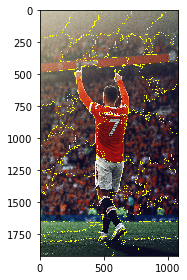

In [5]:
segments_slic3 = slic(img, n_segments=50, compactness=10)
skimage.io.imshow(mark_boundaries(img, segments_slic3))

### Target number of superpixels = 250 & Compactness = 0.5

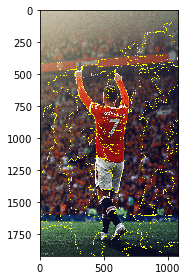

In [6]:
segments_slic4 = slic(img, n_segments=250, compactness=0.5)
skimage.io.imshow(mark_boundaries(img, segments_slic4))

### Discussion

Target number of superpixels gives us the number of labels in segmented output image. As we increase 'n_segments', slight change in color intensity will lead to creation of new label. Compactness balances the color and space proximity. As we increase compactness, more weight is given to space proximity and superpixels are more compact.

## Question 2

### Read and display search and template image

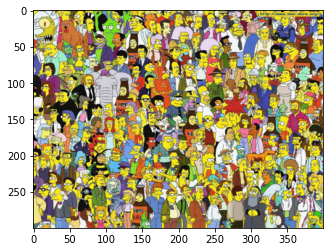

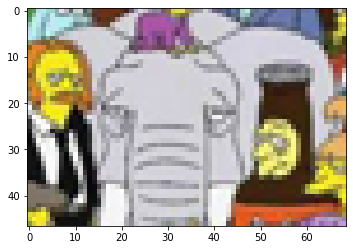

In [7]:
searchImage = skimage.io.imread('search.png')
templateImage = skimage.io.imread('template.png')

plt.subplot(1,1,1)
plt.imshow(searchImage)
plt.show()

plt.subplot(1,1,1)
plt.imshow(templateImage)
plt.show()

### Find mean and standard deviation of template image for each color

In [8]:
a,b,c = templateImage.shape
tempTotalRed = 0
tempTotalGreen = 0
tempTotalBlue = 0

# Find mean of pixel values in template image for each color separately

for i in range(c):
    if (i == 0):
        for j in range(a):
            for k in range(b):
                tempTotalRed += templateImage[j][k][i]
    elif (i == 1):
        for j in range(a):
            for k in range(b):
                tempTotalGreen += templateImage[j][k][i]
    elif (i == 2):
        for j in range(a):
            for k in range(b):
                tempTotalBlue += templateImage[j][k][i]

tempAverageRed = tempTotalRed / (templateImage.size/3)
tempAverageGreen = tempTotalGreen / (templateImage.size/3)
tempAverageBlue = tempTotalBlue / (templateImage.size/3)

# print(tempAverageRed)
# print(tempAverageGreen)
# print(tempAverageBlue)

# Find standard deviation of pixel values in template image for each color separately

squareSumRed = 0
squareSumGreen = 0
squareSumBlue = 0

for i in range(c):
    if (i == 0):
        for j in range(a):
            for k in range(b):
                squareSumRed += (templateImage[j][k][i] - tempAverageRed) ** 2
    elif (i == 1):
        for j in range(a):
            for k in range(b):
                squareSumGreen += (templateImage[j][k][i] - tempAverageGreen) ** 2
    elif (i == 2):
        for j in range(a):
            for k in range(b):
                squareSumBlue += (templateImage[j][k][i] - tempAverageBlue) ** 2

tempStdDevRed = math.sqrt((squareSumRed) / (templateImage.size/3 - 1))
tempStdDevGreen = math.sqrt((squareSumGreen) / (templateImage.size/3 - 1))
tempStdDevBlue = math.sqrt((squareSumBlue) / (templateImage.size/3 - 1))

# print(tempStdDevRed)
# print(tempStdDevGreen)
# print(tempStdDevBlue)

### Find all possible patches and store in a list for RGB individually

In [9]:
# NOTE - This section takes about 7 minutes to compile (Mac M2 Air)

# Shape of template image:
#print(a,b,c)

# Shape of search image:
x,y,z = searchImage.shape
#print(x,y,z)

#Following lists will score all possible patches for RGB channels respectively
patchListRed = []
patchListGreen = []
patchListBlue = []

#23 rows above and below center pixel
#34 colummns left and right of center pixel

for i in range(z):
    
    if (i == 0):
        for j in range(23,(x-23)):
            for k in range(34,(y-34)):
                tempRed = np.zeros((a,b))
                for l in range(a):
                    for m in range(b):
                        tempRed[l][m] = searchImage[l+j-23][m+k-34][i] 
                patchListRed.append(tempRed)
    
    elif (i == 1):
        for j in range(23,(x-23)):
            for k in range(34,(y-34)):
                tempGreen = np.zeros((a,b))
                for l in range(a):
                    for m in range(b):
                        tempGreen[l][m] = searchImage[l+j-23][m+k-34][i] 
                patchListGreen.append(tempGreen)
    
    elif (i == 2):
        for j in range(23,(x-23)):
            for k in range(34,(y-34)):
                tempBlue = np.zeros((a,b))
                for l in range(a):
                    for m in range(b):
                        tempBlue[l][m] = searchImage[l+j-23][m+k-34][i] 
                patchListBlue.append(tempBlue)

### Find mean and standard deviation for all patches for RGB individually and store in a list

In [10]:
# Mean and standard deviation for all patches in Red channel

patchMeanListRed = []
patchStdDevListRed = []

for i in range(len(patchListRed)):
    mean = np.mean(patchListRed[i])
    stddev = np.std(patchListRed[i], ddof = 1)
    patchMeanListRed.append(mean)
    patchStdDevListRed.append(stddev)

# Mean and standard deviation for all patches in Green channel

patchMeanListGreen = []
patchStdDevListGreen = []

for i in range(len(patchListGreen)):
    mean = np.mean(patchListGreen[i])
    stddev = np.std(patchListGreen[i], ddof = 1)
    patchMeanListGreen.append(mean)
    patchStdDevListGreen.append(stddev)

# Mean and standard deviation for all patches in Green channel

patchMeanListBlue = []
patchStdDevListBlue = []

for i in range(len(patchListBlue)):
    mean = np.mean(patchListBlue[i])
    stddev = np.std(patchListBlue[i], ddof = 1)
    patchMeanListBlue.append(mean)
    patchStdDevListBlue.append(stddev)

# Calculate NCC for each patch and store in a list

In [19]:
# NOTE - This section takes about 30 minutes to compile (Mac M2 Air)

# Template details:
# Image stored in templateImage. RGB mean stored in tempAverageRed/tempAverageGreen/tempAverageBlue
# RGB Standard Deviations stored in tempStdDevRed/tempStdDevGreen/tempStdDevBlue

# Patch details:
# Patches stored in lists patchListRed/patchListGreen/patchListBlue
# RGB mean is stored in lists patchMeanListRed/patchMeanListGreen/patchMeanListBlue
# RGB Standard Deviations stored in lists patchStdDevListRed/patchStdDevListGreen/patchStdDevListBlue


x = len(patchListRed)
a,b,c = templateImage.shape 
innerSumRed = 0
innerSumGreen = 0
innerSumBlue = 0
NCC = []

for i in range(x):
    for l in range(c):
        if (l == 0):
            for j in range(a):
                for k in range(b):
                    innerSumRed += ((patchListRed[i][j][k] - patchMeanListRed[i]) * (templateImage[j][k][l] - tempAverageRed)) / (patchStdDevListRed[i] * tempStdDevRed)
            outerSumRed = innerSumRed / (templateImage.size/3 - 1)
        elif (l == 1):
            for j in range(a):
                for k in range(b):
                    innerSumGreen += ((patchListGreen[i][j][k] - patchMeanListGreen[i]) * (templateImage[j][k][l] - tempAverageGreen)) / (patchStdDevListGreen[i] * tempStdDevGreen)
            outerSumGreen = innerSumGreen / (templateImage.size/3 - 1)
        elif (l == 2):
            for j in range(a):
                for k in range(b):
                    innerSumBlue += ((patchListBlue[i][j][k] - patchMeanListBlue[i]) * (templateImage[j][k][l] - tempAverageBlue)) / (patchStdDevListBlue[i] * tempStdDevBlue)
            outerSumBlue = innerSumBlue / (templateImage.size/3 - 1)

    nccValue = (outerSumRed + outerSumGreen + outerSumBlue) / 3
    NCC.append(nccValue)

print(len(NCC))
print(max(NCC))
print(NCC[0])
                

84328
133.31529411664818
0.003228331562806249


### Sort resulting scores from best to worst and plot

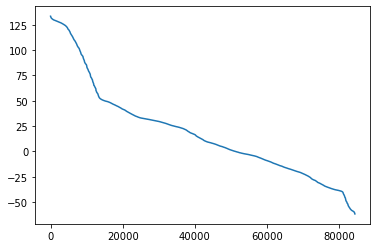

In [77]:
finalList = []
finalList = NCC.copy()
finalList.sort(reverse=1)
plt.plot(finalList)

### NCC values corresponding to 1st, 2nd, 5th, 10th, 100th, and 500th best matches

In [93]:
# Find values of above mentioned best matches

firstBest = finalList[0]
secondBest = finalList[1]
fifthBest = finalList[4]
tenthBest = finalList[9]
hundredthBest = finalList[99]
fiveHundredthBest = finalList[499]

# print(firstBest)
# print(secondBest)
# print(fifthBest)
# print(tenthBest)
# print(hundredthBest)
# print(fiveHundredthBest)

### Find indices and coordinates of above mentioned best matches

In [108]:
# Find index of above mentioned best matches

firstBestIndex = NCC.index(firstBest)
secondBestIndex = NCC.index(secondBest)
fifthBestIndex = NCC.index(fifthBest)
tenthBestIndex = NCC.index(tenthBest)
hundredthBestIndex = NCC.index(hundredthBest)
fiveHundredthBestIndex = NCC.index(fiveHundredthBest)

# print(firstBestIndex)
# print(secondBestIndex)
# print(fifthBestIndex)
# print(tenthBestIndex)
# print(hundredthBestIndex)
# print(fiveHundredthBestIndex)

# Find coordinates of above mentioned best matches

rows = searchImage.shape[0] - 46
columns = searchImage.shape[1] - 68

firstBestY = int(firstBestIndex/columns)
firstBestX = firstBestIndex%rows

secondBestY = int(secondBestIndex/columns)
secondBestX = secondBestIndex%rows

fifthBestY = int(fifthBestIndex/columns)
fifthBestX = fifthBestIndex%rows

tenthBestY = int(tenthBestIndex/columns)
tenthBestX = tenthBestIndex%rows

hundredthBestY = int(hundredthBestIndex/columns)
hundredthBestX = hundredthBestIndex%rows

fiveHundredthBestY = int(fiveHundredthBestIndex/columns)
fiveHundredthBestX = fiveHundredthBestIndex%rows

print(firstBestX,firstBestY)
print(secondBestX,secondBestY)
print(fifthBestX,fifthBestY)
print(tenthBestX,tenthBestY)
print(hundredthBestX,hundredthBestY)
print(fiveHundredthBestX,fiveHundredthBestY)


80 91
81 91
83 91
75 91
30 90
74 94


### Show 1st best match

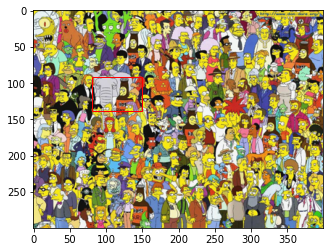

In [85]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((firstBestX,firstBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Show 2nd best match

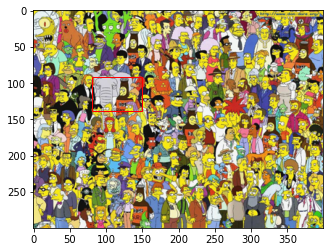

In [87]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((secondBestX,secondBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Show 5th best match

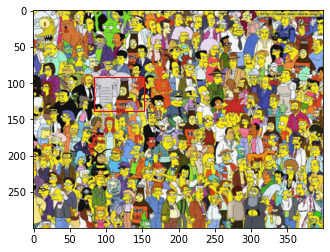

In [88]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((fifthBestX,fifthBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()


### Show 10th best match

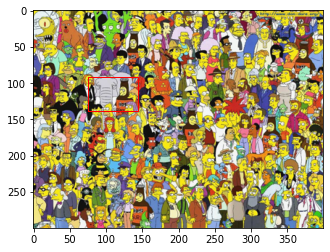

In [89]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((tenthBestX,tenthBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Show 100th best match

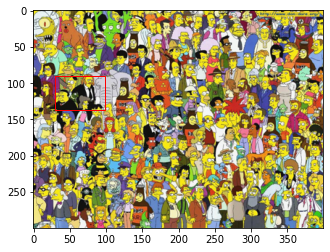

In [90]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((hundredthBestX,hundredthBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Show 500th best match

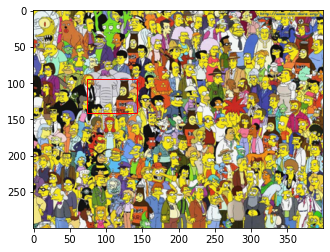

In [91]:
fig,ax = plt.subplots()
ax.imshow(searchImage)
rect = patches.Rectangle((fiveHundredthBestX,fiveHundredthBestY),templateImage.shape[1],templateImage.shape[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

### Discussion

We observe that NCC works very well even when the template did not come from the search image. First, second, fifth, and tenth best matches are almost similar. However, hundredth best match is not good as it detects an incorrect image. But five hundredth best match again detects the right object of interest. This shows the robustness of this algorithm.